## Initiate the vissim instance

In [1]:
# COM-Server
import win32com.client as com
import igraph
import matplotlib.pyplot as plt
import qgrid
from VISSIM_helpers import VissimRoadNet
from os.path import abspath

Add autocompletion for VISSIM COM Object

In [2]:
from IPython.utils.generics import complete_object

@complete_object.register(com.DispatchBaseClass)
def complete_dispatch_base_class(obj, prev_completions):
    try:
        ole_props = set(obj._prop_map_get_).union(set(obj._prop_map_put_))
        return list(ole_props) + prev_completions
    except AttributeError:
        pass

Start Vissim and load constants

In [3]:
Vissim = com.gencache.EnsureDispatch("Vissim.Vissim")
from win32com.client import constants as c

Load the test network

In [4]:
FileName = abspath(r"C:\Users\Public\Documents\PTV Vision\PTV Vissim 9\Examples Demo\Urban Freeway Dyn Assign Redmond.US\I405 OD.inpx")
Vissim.LoadNet(FileName)

In [6]:
vis_net = Vissim.Net
assert vis_net.DynamicAssignment.CreateGraph(c.CGEdgeTypeDynamicAssignment)

## Read the dynamic assignment nodes and edges

### Convert the network to a igraph directed graph

In [7]:
network_graph = VissimRoadNet(vis_net)

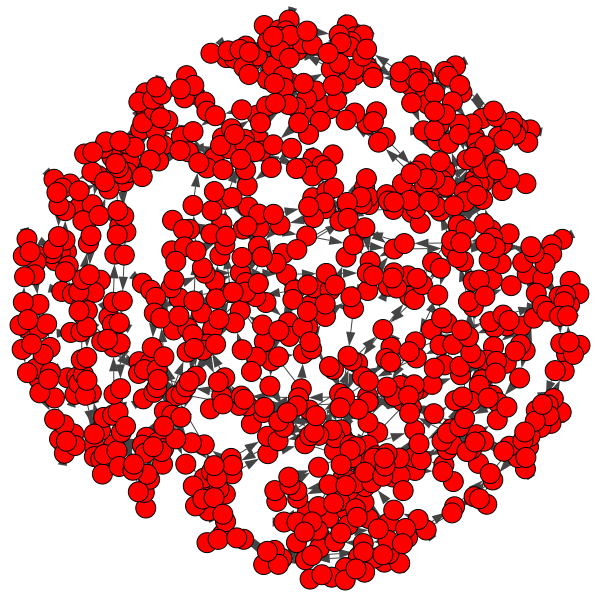

In [8]:
igraph.plot(network_graph, bbox=(0, 0, 600, 600))

Save and display list of edges

In [9]:
network_graph.visedges.to_pickle("edges_attr.pkl.gz", compression="gzip")
edges_widget = qgrid.show_grid(network_graph.visedges, show_toolbar=False)
edges_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
# Save graph and like attributes

link_attrs = [attr.Code for attr in Vissim.Net.Links.Attributes.GetAll()]
link_attr_names = [attr.Name for attr in Vissim.Net.Links.Attributes.GetAll()]
links = [list(link) for link in Vissim.Net.Links.GetMultipleAttributes(link_attrs)]

In [11]:
import pandas as pd

links = pd.DataFrame(links, columns=link_attrs)
links = links.set_index(['No'], drop=True)

In [12]:
qgrid.show_grid(links)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [13]:
network_graph.net = None
network_graph.save("network_graph.pkl.gz", format="picklez")
links.to_pickle("network_links.pkl.gz", compression="gzip")

detach Vissim instance

In [14]:
Vissim.Exit()
del Vissim